In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("finance_economics_dataset.csv")

df["Date"] = pd.to_datetime(df["Date"])

In [28]:
# What is the shape of the dataset?
df.shape



(3000, 24)

In [29]:
# What are the column names and their data types? 
df.dtypes


Date                                     datetime64[ns]
Stock Index                                      object
Open Price                                      float64
Close Price                                     float64
Daily High                                      float64
Daily Low                                       float64
Trading Volume                                    int64
GDP Growth (%)                                  float64
Inflation Rate (%)                              float64
Unemployment Rate (%)                           float64
Interest Rate (%)                               float64
Consumer Confidence Index                         int64
Government Debt (Billion USD)                     int64
Corporate Profits (Billion USD)                   int64
Forex USD/EUR                                   float64
Forex USD/JPY                                   float64
Crude Oil Price (USD per Barrel)                float64
Gold Price (USD per Ounce)                      

In [30]:
# How many unique stock indices are there? 
df["Stock Index"].nunique()


3

In [31]:
# What is the date range of the dataset? 
df["Date"].min(), df["Date"].max()


(Timestamp('2000-01-01 00:00:00'), Timestamp('2008-03-18 00:00:00'))

In [32]:
# Are there any missing values? 
df.isnull().sum()


Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

In [8]:
# Are there negative values in columns that should be non-negative?
non_negative_cols = ["Trading Volume", "Gold Price (USD per Ounce)", "Crude Oil Price (USD per Barrel)",
    "Corporate Profits (Billion USD)", "Retail Sales (Billion USD)", "Consumer Spending (Billion USD)"]

(df[non_negative_cols] < 0).sum()


Trading Volume                      0
Gold Price (USD per Ounce)          0
Crude Oil Price (USD per Barrel)    0
Corporate Profits (Billion USD)     0
Retail Sales (Billion USD)          0
Consumer Spending (Billion USD)     0
dtype: int64

In [ ]:
# What is the summary of GDP Growth (%)? 
df["GDP Growth (%)"].describe()


count    3000.000000
mean        2.608903
std         4.287337
min        -5.000000
25%        -1.012500
50%         2.725000
75%         6.242500
max        10.000000
Name: GDP Growth (%), dtype: float64

In [ ]:
# Are there rows with zero or near-zero trading volume? 
df[df["Trading Volume"] <= 10]


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)


In [ ]:
# Are there any duplicate rows? 
df.duplicated().sum()


np.int64(0)

In [7]:
# Are there outliers in GDP, Gold, or Oil prices? 
def find_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    return df[(df[column] < q1 - 1.5 * iqr) | (df[column] > q3 + 1.5 * iqr)]

find_outliers("GDP Growth (%)")
find_outliers("Gold Price (USD per Ounce)")
find_outliers("Crude Oil Price (USD per Barrel)")



,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)


In [ ]:
#  What is the summary of Inflation Rate (%)? 
df["Inflation Rate (%)"].describe()


count    3000.000000
mean        5.096830
std         2.910513
min         0.010000
25%         2.607500
50%         5.110000
75%         7.600000
max        10.000000
Name: Inflation Rate (%), dtype: float64

In [ ]:
# What is the average unemployment rate? 
df["Unemployment Rate (%)"].mean()


np.float64(8.663786666666667)

In [34]:
# Which index has the highest trading volume? 
df.groupby("Stock Index")["Trading Volume"].sum().idxmax()


'S&P 500'

In [35]:
#  How many stock records are from each index?
df["Stock Index"].value_counts()


Stock Index
S&P 500      1036
NASDAQ       1007
Dow Jones     957
Name: count, dtype: int64

In [36]:
# What is the correlation between inflation and interest rate? 
df["Inflation Rate (%)"].corr(df["Interest Rate (%)"])


np.float64(0.005732927235576248)

In [37]:
# What is the average Consumer Confidence Index? 
df["Consumer Confidence Index"].mean()



np.float64(85.036)

In [38]:
# Which column has the highest standard deviation? 
df.std(numeric_only=True).idxmax()


'Trading Volume'

In [9]:
#  What is the highest gold price recorded? 
df["Gold Price (USD per Ounce)"].max()


np.float64(2499.66)

In [10]:
#  Which date had the highest crude oil price? 
df.loc[df["Crude Oil Price (USD per Barrel)"].idxmax(), "Date"]


Timestamp('2001-11-22 00:00:00')

In [11]:
# What is the average corporate profit? 
df["Corporate Profits (Billion USD)"].mean()


np.float64(2553.7563333333333)

In [42]:
#  What percentage of the dataset shows negative GDP growth? 
(df["GDP Growth (%)"] < 0).mean() * 100


np.float64(31.566666666666666)

In [43]:
# Does high inflation correspond to higher interest rates?
df["Inflation Rate (%)"].corr(df["Interest Rate (%)"])



np.float64(0.005732927235576248)

In [12]:
#  Is there a relationship between unemployment and consumer spending?
df["Unemployment Rate (%)"].corr(df["Consumer Spending (Billion USD)"])


np.float64(0.018786001938759095)

In [13]:
# Do higher corporate profits align with higher consumer confidence? 
df["Corporate Profits (Billion USD)"].corr(df["Consumer Confidence Index"])


np.float64(0.01800805588826958)

<Axes: title={'center': 'Crude Oil Price Trend'}, xlabel='Date'>

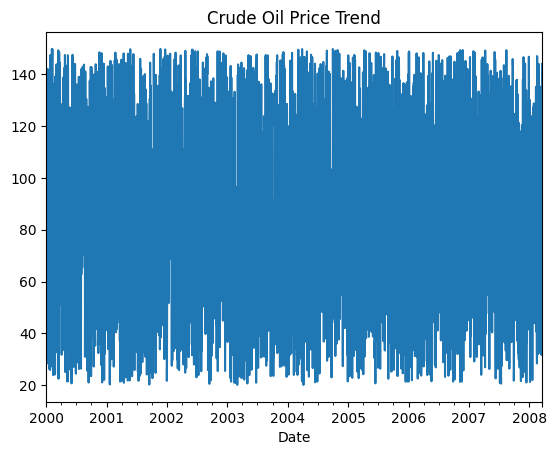

In [14]:
# What’s the trend of crude oil prices over time?
df.sort_values("Date").set_index("Date")["Crude Oil Price (USD per Barrel)"].plot(
    title="Crude Oil Price Trend"
)


In [15]:
# Are gold prices inversely related to stock performance? 
df["Gold Price (USD per Ounce)"].corr(df["Close Price"])


np.float64(-0.014543960422329251)

In [16]:
# Does government debt impact consumer confidence? 
df["Government Debt (Billion USD)"].corr(df["Consumer Confidence Index"])


np.float64(-0.03637006085825002)

In [17]:
# How do mergers & acquisitions (M&A) activity correlate with stock index closing prices? 
df["Mergers & Acquisitions Deals"].corr(df["Close Price"])


np.float64(0.0026371007894390383)

In [18]:
# . Is retail sales growth associated with GDP growth? 
df["Retail Sales (Billion USD)"].corr(df["GDP Growth (%)"])


np.float64(-0.014287611445719921)

In [19]:
# Is stock market performance linked to consumer spending? 
df["Close Price"].corr(df["Consumer Spending (Billion USD)"])


np.float64(0.0003755593931885114)

In [52]:
#  Which stock index had the highest average closing price?
df.groupby("Stock Index")["Close Price"].mean().idxmax()


'Dow Jones'

In [53]:
# . What is the relationship between interest rate and unemployment?
df["Interest Rate (%)"].corr(df["Unemployment Rate (%)"])


np.float64(0.018004072130972763)

In [20]:
#  Do lower consumer confidence values coincide with higher bankruptcy rates?
df["Consumer Confidence Index"].corr(df["Bankruptcy Rate (%)"])



np.float64(-0.01631304347909407)

In [55]:
#  Which indicator has the highest correlation with stock close price?
df.corr(numeric_only=True)["Close Price"].sort_values(ascending=False)


Close Price                              1.000000
Daily High                               0.999821
Daily Low                                0.999820
Open Price                               0.999688
Retail Sales (Billion USD)               0.049370
Bankruptcy Rate (%)                      0.029380
Venture Capital Funding (Billion USD)    0.021414
Interest Rate (%)                        0.020434
Trading Volume                           0.016283
Consumer Confidence Index                0.013482
Corporate Profits (Billion USD)          0.008797
Mergers & Acquisitions Deals             0.002637
Crude Oil Price (USD per Barrel)         0.002563
Consumer Spending (Billion USD)          0.000376
Unemployment Rate (%)                   -0.001907
Government Debt (Billion USD)           -0.007332
Inflation Rate (%)                      -0.007972
Real Estate Index                       -0.008639
GDP Growth (%)                          -0.012748
Gold Price (USD per Ounce)              -0.014544


In [21]:
# Are unemployment rates lower when corporate profits are high?
df["Unemployment Rate (%)"].corr(df["Corporate Profits (Billion USD)"])


np.float64(0.00829241418823554)

In [ ]:
!pip install matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


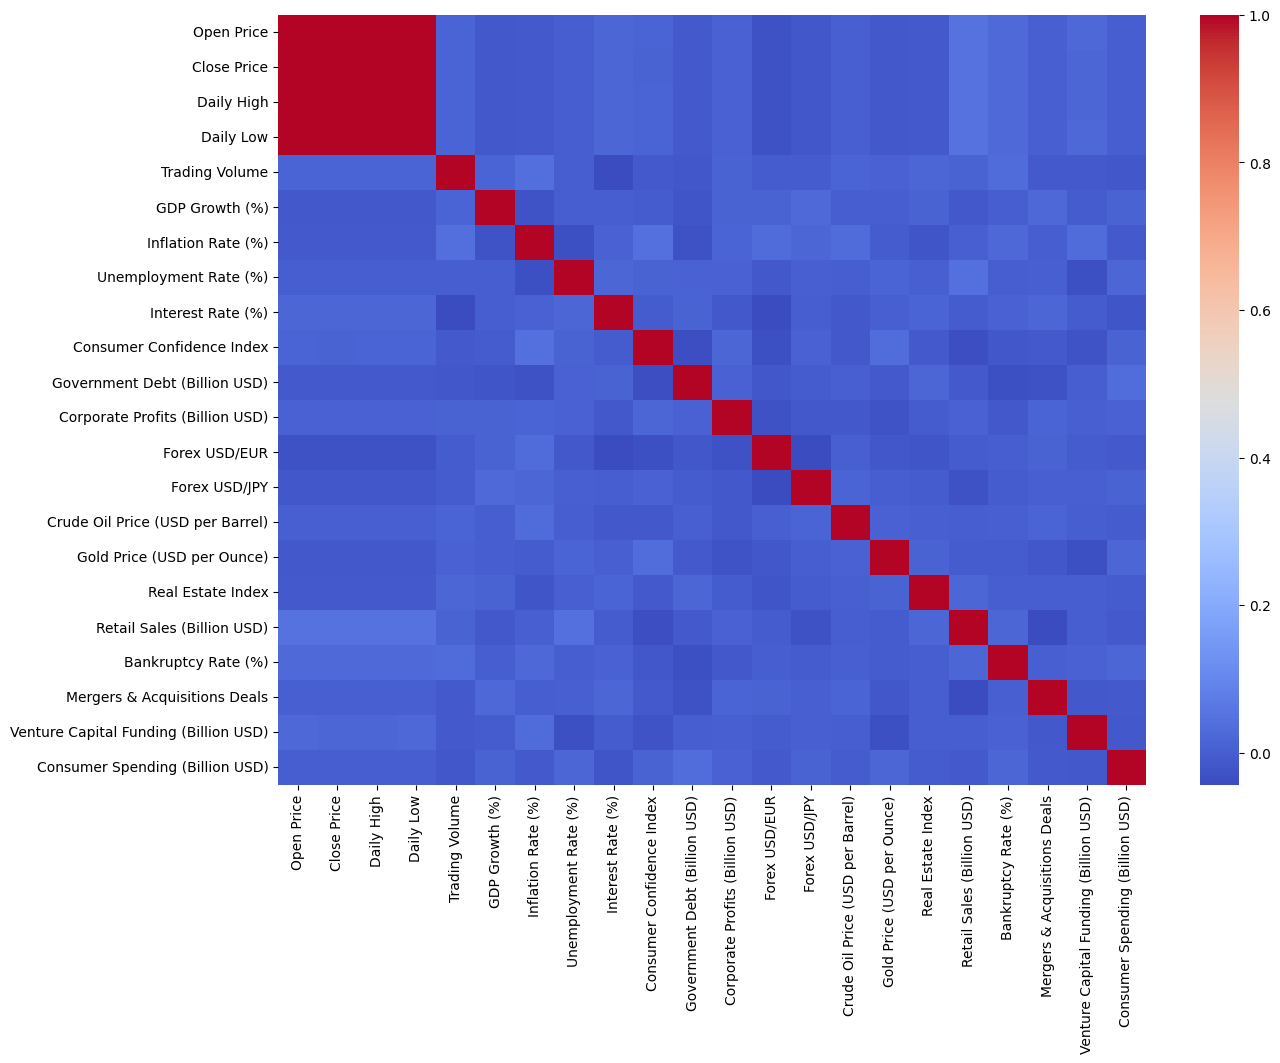

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()
